# Seismic Instrument

Created by Jw @2020.06.06

There are different types of seismometers to record the "ground truth" motion of the earth. Different seismometers are designed because none of them can fully couple with the Earth's motion from a reference frame. The following will demonstrate and compare four common seismometers used in the Hong Kong Observatory. 

Before probe into the details of each type of seismometers, the below introduce some commmon format storing the specification of each seismometers. They are entitled with different names and dataformat nonetheless having the same content. The specification of the seismomters contains:

   1. Station information including *network, station name, channel, locations (elevation, lat, lon), duration of deployment*
   
   2. Intrumental Response, the relationship between measured motion and the "ground true" motion
   
### Data Format
There are a few formats routinely used to store and access the informations of the seismometers. Details of each format can be found in the section ***Data Source - Seismic Instruments - Metadata File Format***.
    
   1. **Dataless** - **Seed**
   
   2. **Station xml** - *obspy (python)*
   
   3. **Poles and zeros** (PZ files)

In the ANTELOPE system, there are different programs to convert and build seismic analysis unit based on different format. *Dataless* is the most commonly used to date.

   - Make Dataless seed: `mk_dataless_seed`
   
To download and update the dataless worldwide, `rt@hkss1:/home/rt/dataless` contains all the required file and script to automatically download and update the station instrumental information data.
    
### Demo - stationxml and instrumental response
Below uses `obspy.read_inventory` to read the stationxml collected in the ANTELOPE system and display the relavent HKPS seismic station instrumental specifications. 

Different types of seismometers have different frequency ranges. Each seismometer is sensitive to a range of frequency of the motion. Mathematically, the recording are the convolution of the instrumental response and the ground motion. The frequency response of the seismometer shows the performance of the instrument in recording ground motion in different frequency ranges. Modern seismometers have developed a sophiesticated design to obtain a wide-range of flat frequency response. The figure shows the instrumental response of the corresponding channel ***LHZ, HHZ, BHZ & HNZ***.  
    (Note that the response curve of HNZ is a slope because the graph shows the output in *velocity*.)

   <img src="img/instrument/HKPS_instrument.png" width=700>

<IPython.core.display.Javascript object>


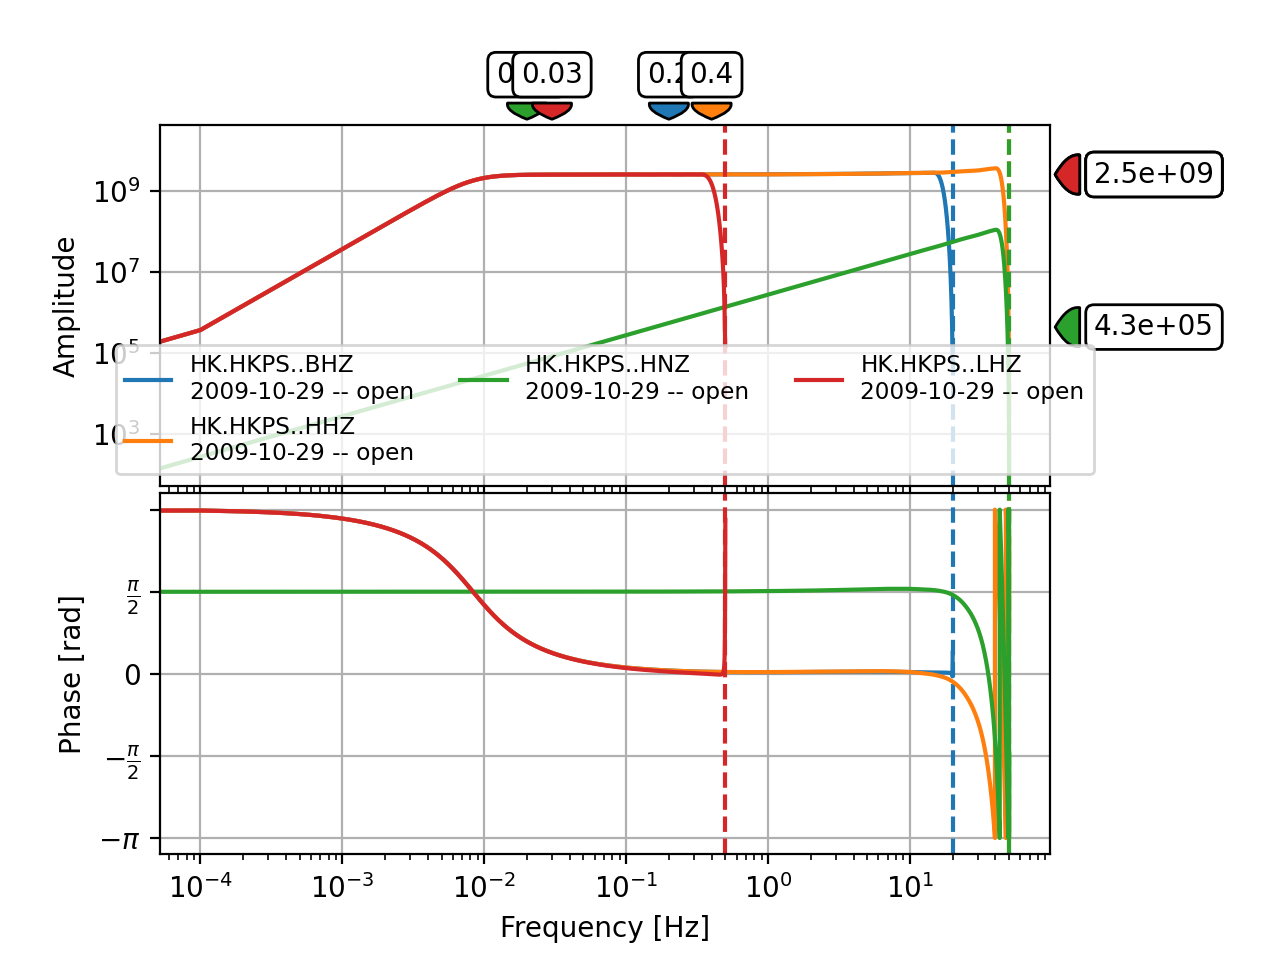

<IPython.core.display.Javascript object>


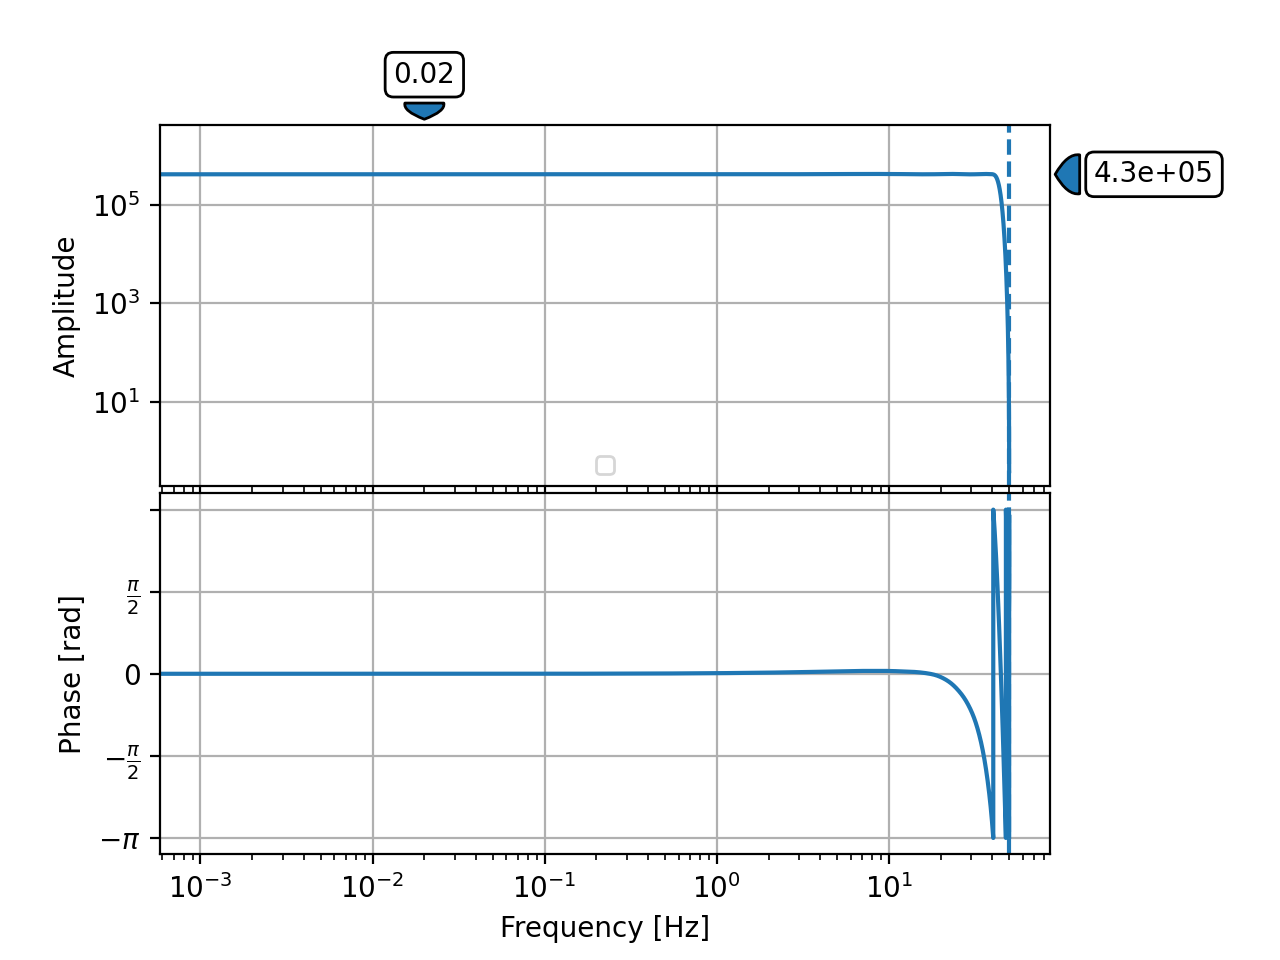

No handles with labels found to put in legend.


Response type: PolesZerosResponseStage, Stage Sequence Number: 1
	From m/s**2 (acceleration in meters per seconds squared) to V (emf in volts)
	Stage gain: 1.02018, defined at 0.02 Hz
	Transfer function type: LAPLACE (RADIANS/SECOND)
	Normalization factor: 2.45956e+13, Normalization frequency: 0.02 Hz
	Poles: (-981+1009j), (-981-1009j), (-3290+1263j), (-3290-1263j)
	Zeros: 

In [50]:
%matplotlib notebook
from matplotlib import pyplot as plt
from obspy import read, read_inventory, Stream, UTCDateTime
from obspy.clients.fdsn import Client as FDSNClient

verbose = False
date = UTCDateTime()

# Station xml
station_xml_file = '../tmp/dataless/HK.xml'
HK_inv = read_inventory(station_xml_file)
if verbose:
    print("The HK seismographic Network station xml contains the following information:")
    print(HK_inv)

# Plot response
HK_inv.plot_response(min_freq=0.0001, station='HKPS', channel="[LBH][HN]Z", label_epoch_dates=True)


# Plot response by each channel
#     Obtain reponse of HKPS boardband, shortperiod and strong motion seismometer

#HKPS_BH = HK_inv.get_response('HK.HKPS..BHZ', date)
#HKPS_HH = HK_inv.get_response('HK.HKPS..HHZ', date)
#HKPS_HN = HK_inv.get_response('HK.HKPS..HNZ', date)
#HKPS_LH = HK_inv.get_response('HK.HKPS..LHZ', date)

#HKPS_BH.plot(0.001, output="VEL", label="HKPS")
#HKPS_HH.plot(0.001, output="VEL", label="HKPS")
HKPS_HN.plot(0.001, output="ACC")
#HKPS_LH.plot(0.001, output="VEL", label="HKPS")

# Convert to PAZ
HKPS_HN.get_paz()


### Case Study 1 - 2020-02-05T18:12:37 UTC M6.2 Java, Indonesia 592.4 km

The following would demonstrate with a real teleseismic case from the JAVA M6.2 earthquake using the HKPS station.

The below code visualize the filtering and processes used to compute the seismogram from raw data. 
   
   - First row: [Spectrogram and filter used, Raw data with voltage as unit. ]
   - Second row: [Spectrogram and intrument reponse, Raw data after filtering ]
   - Third row: [Spectrogram and inverted instrument response, resulting seismogram ]
<img src=img/instrument/2020_01_04_M32_Lantau/Instr_resp_BHZ.png width=700>


<IPython.core.display.Javascript object>


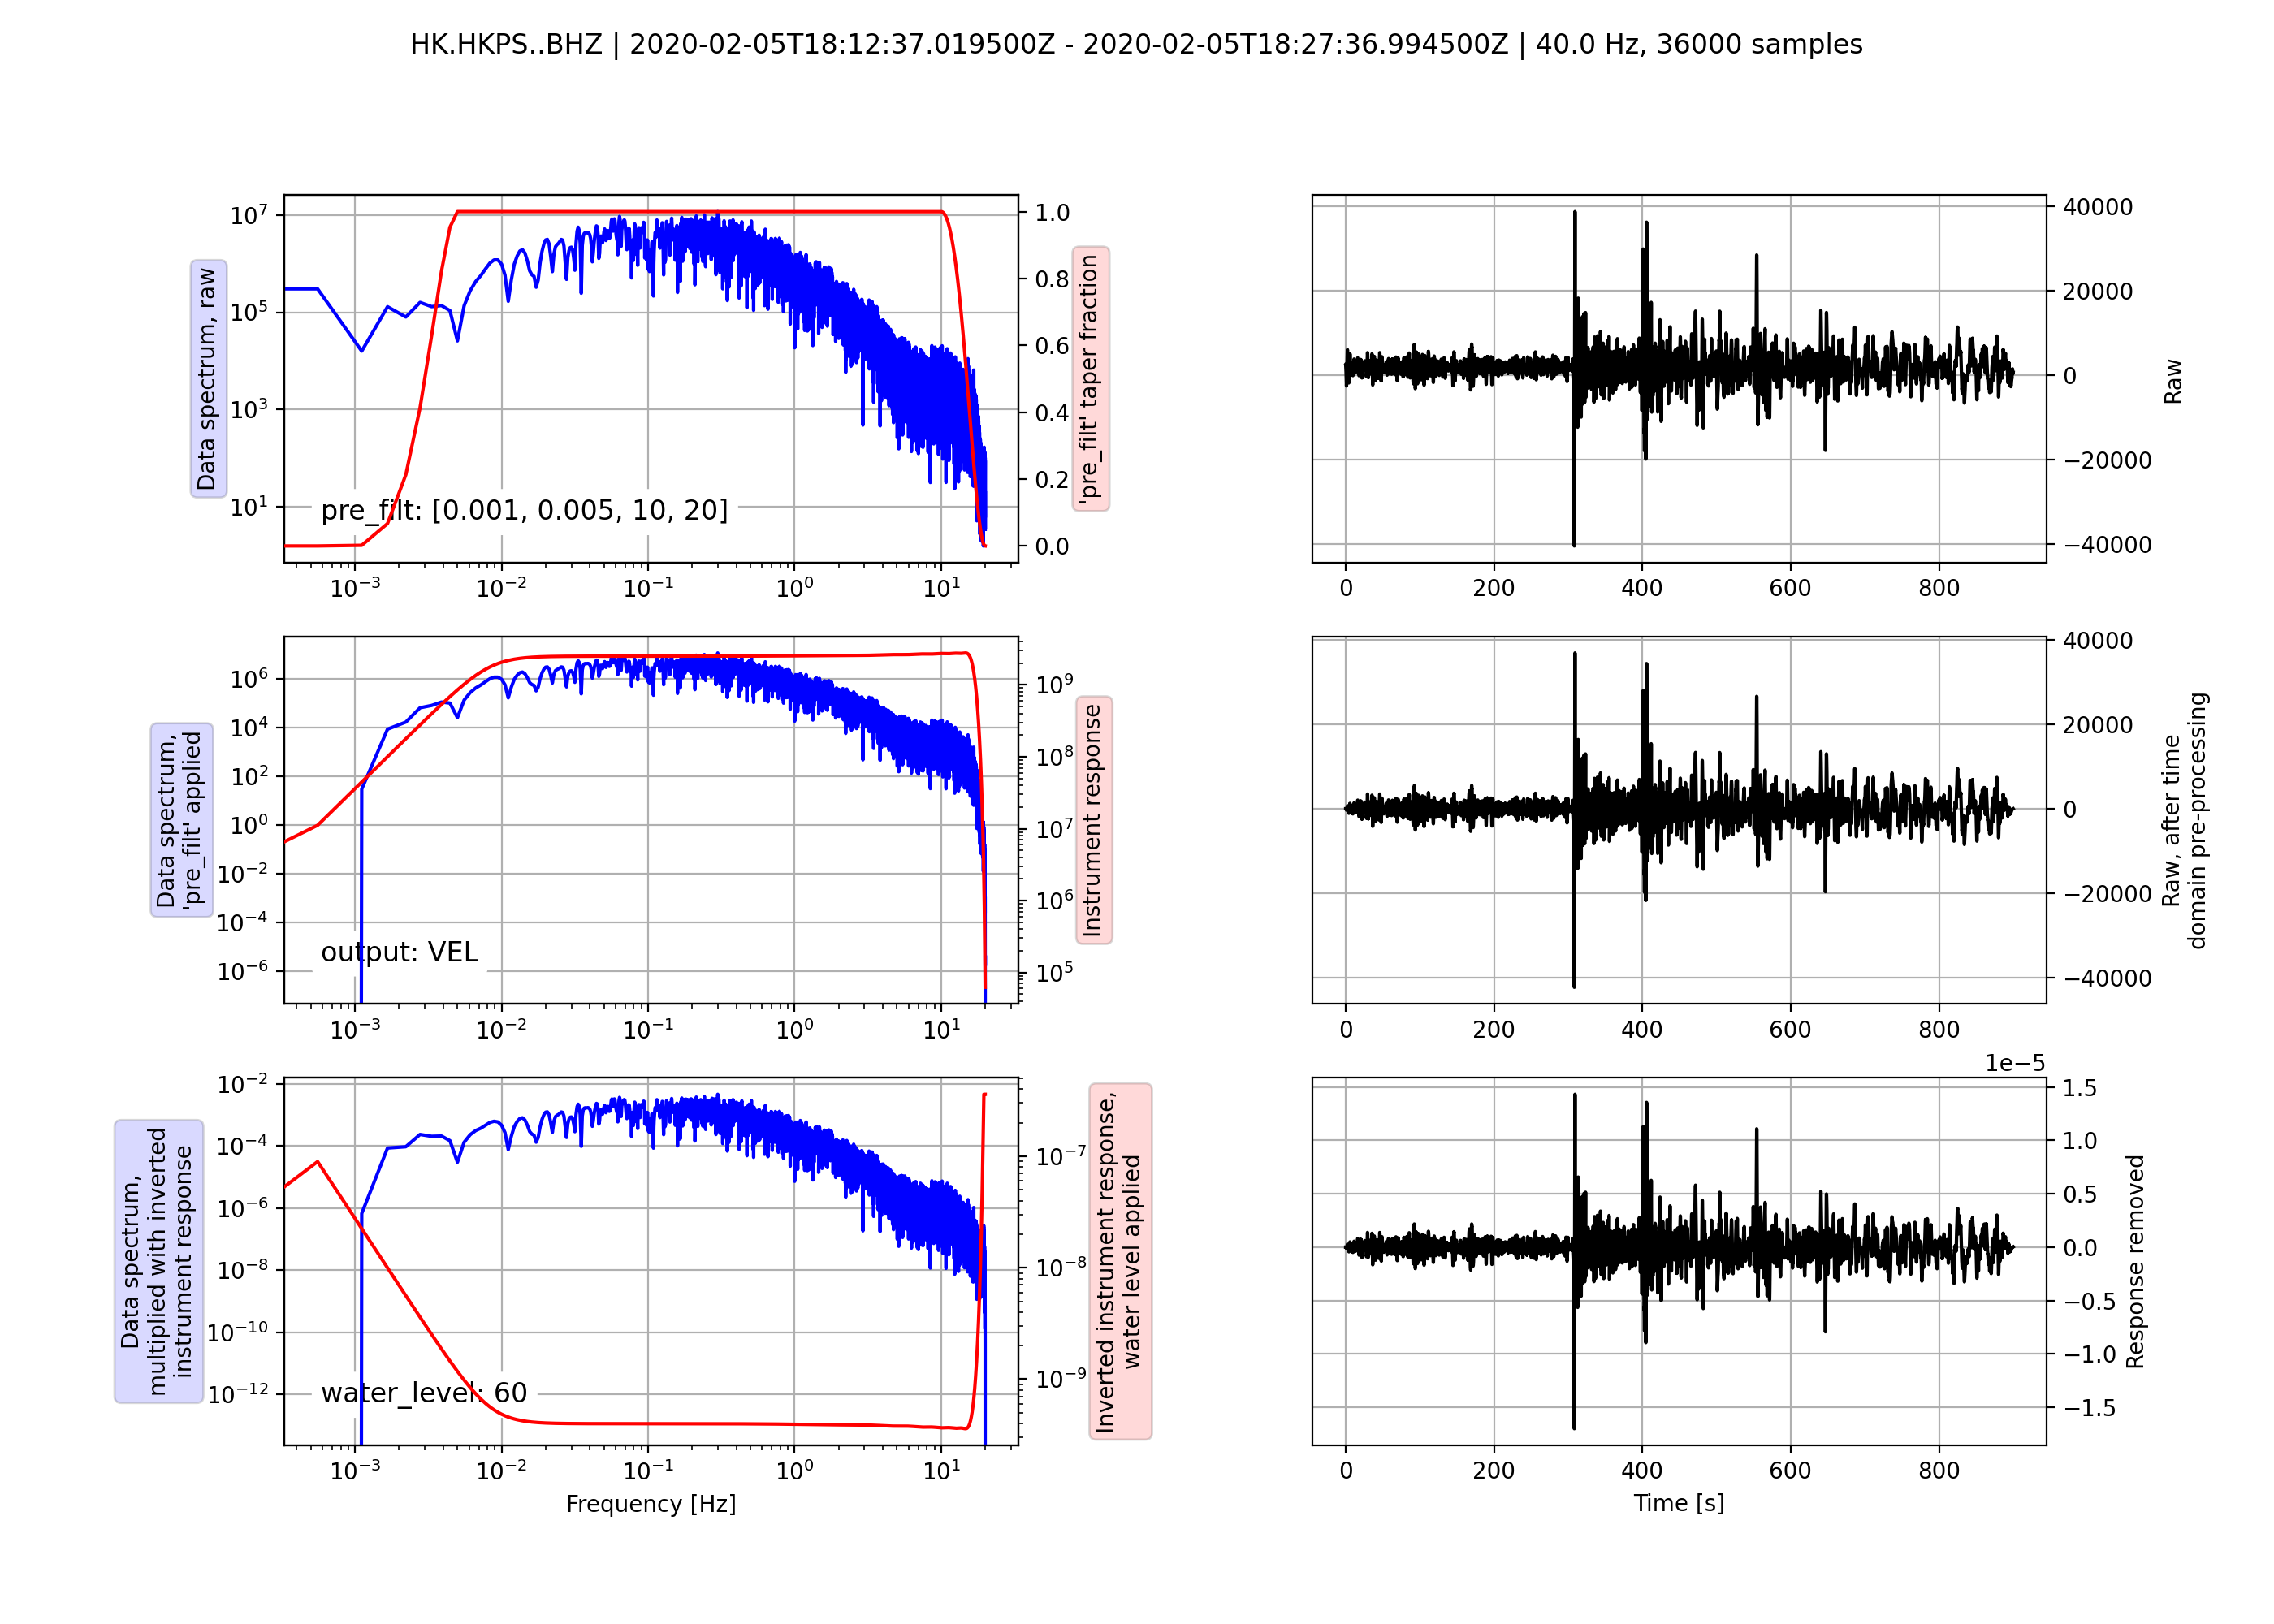

<IPython.core.display.Javascript object>


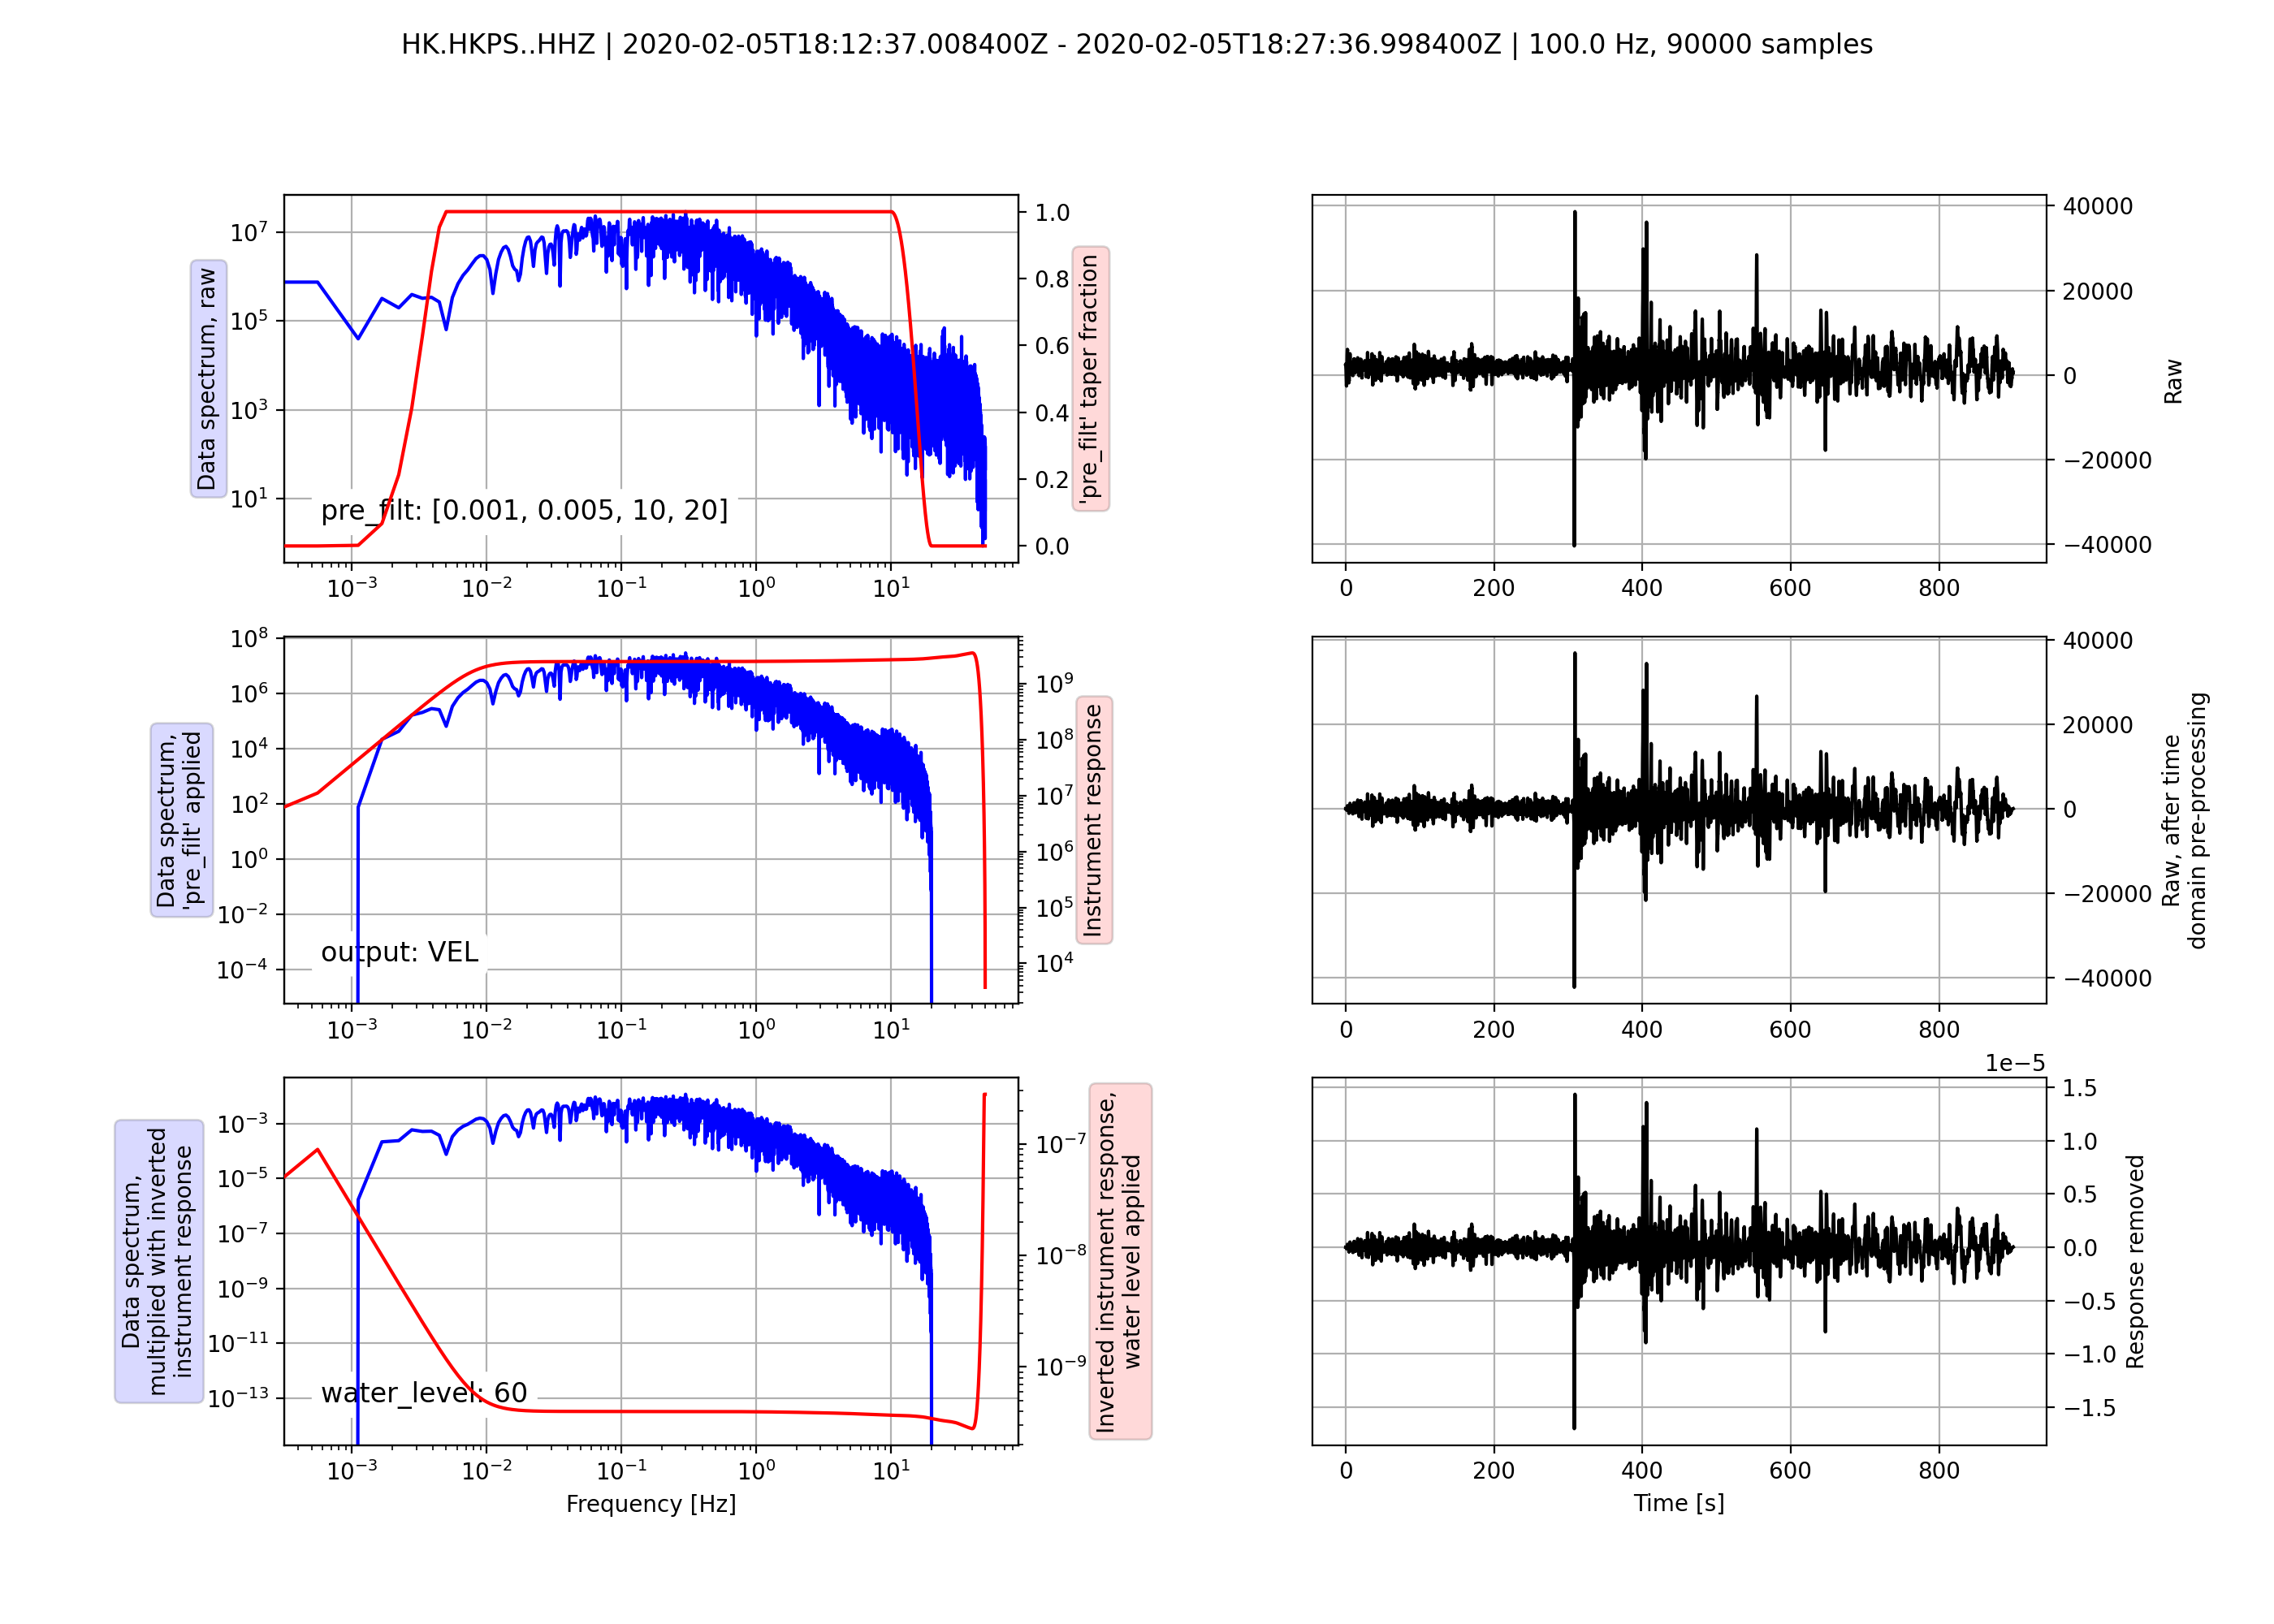

<IPython.core.display.Javascript object>


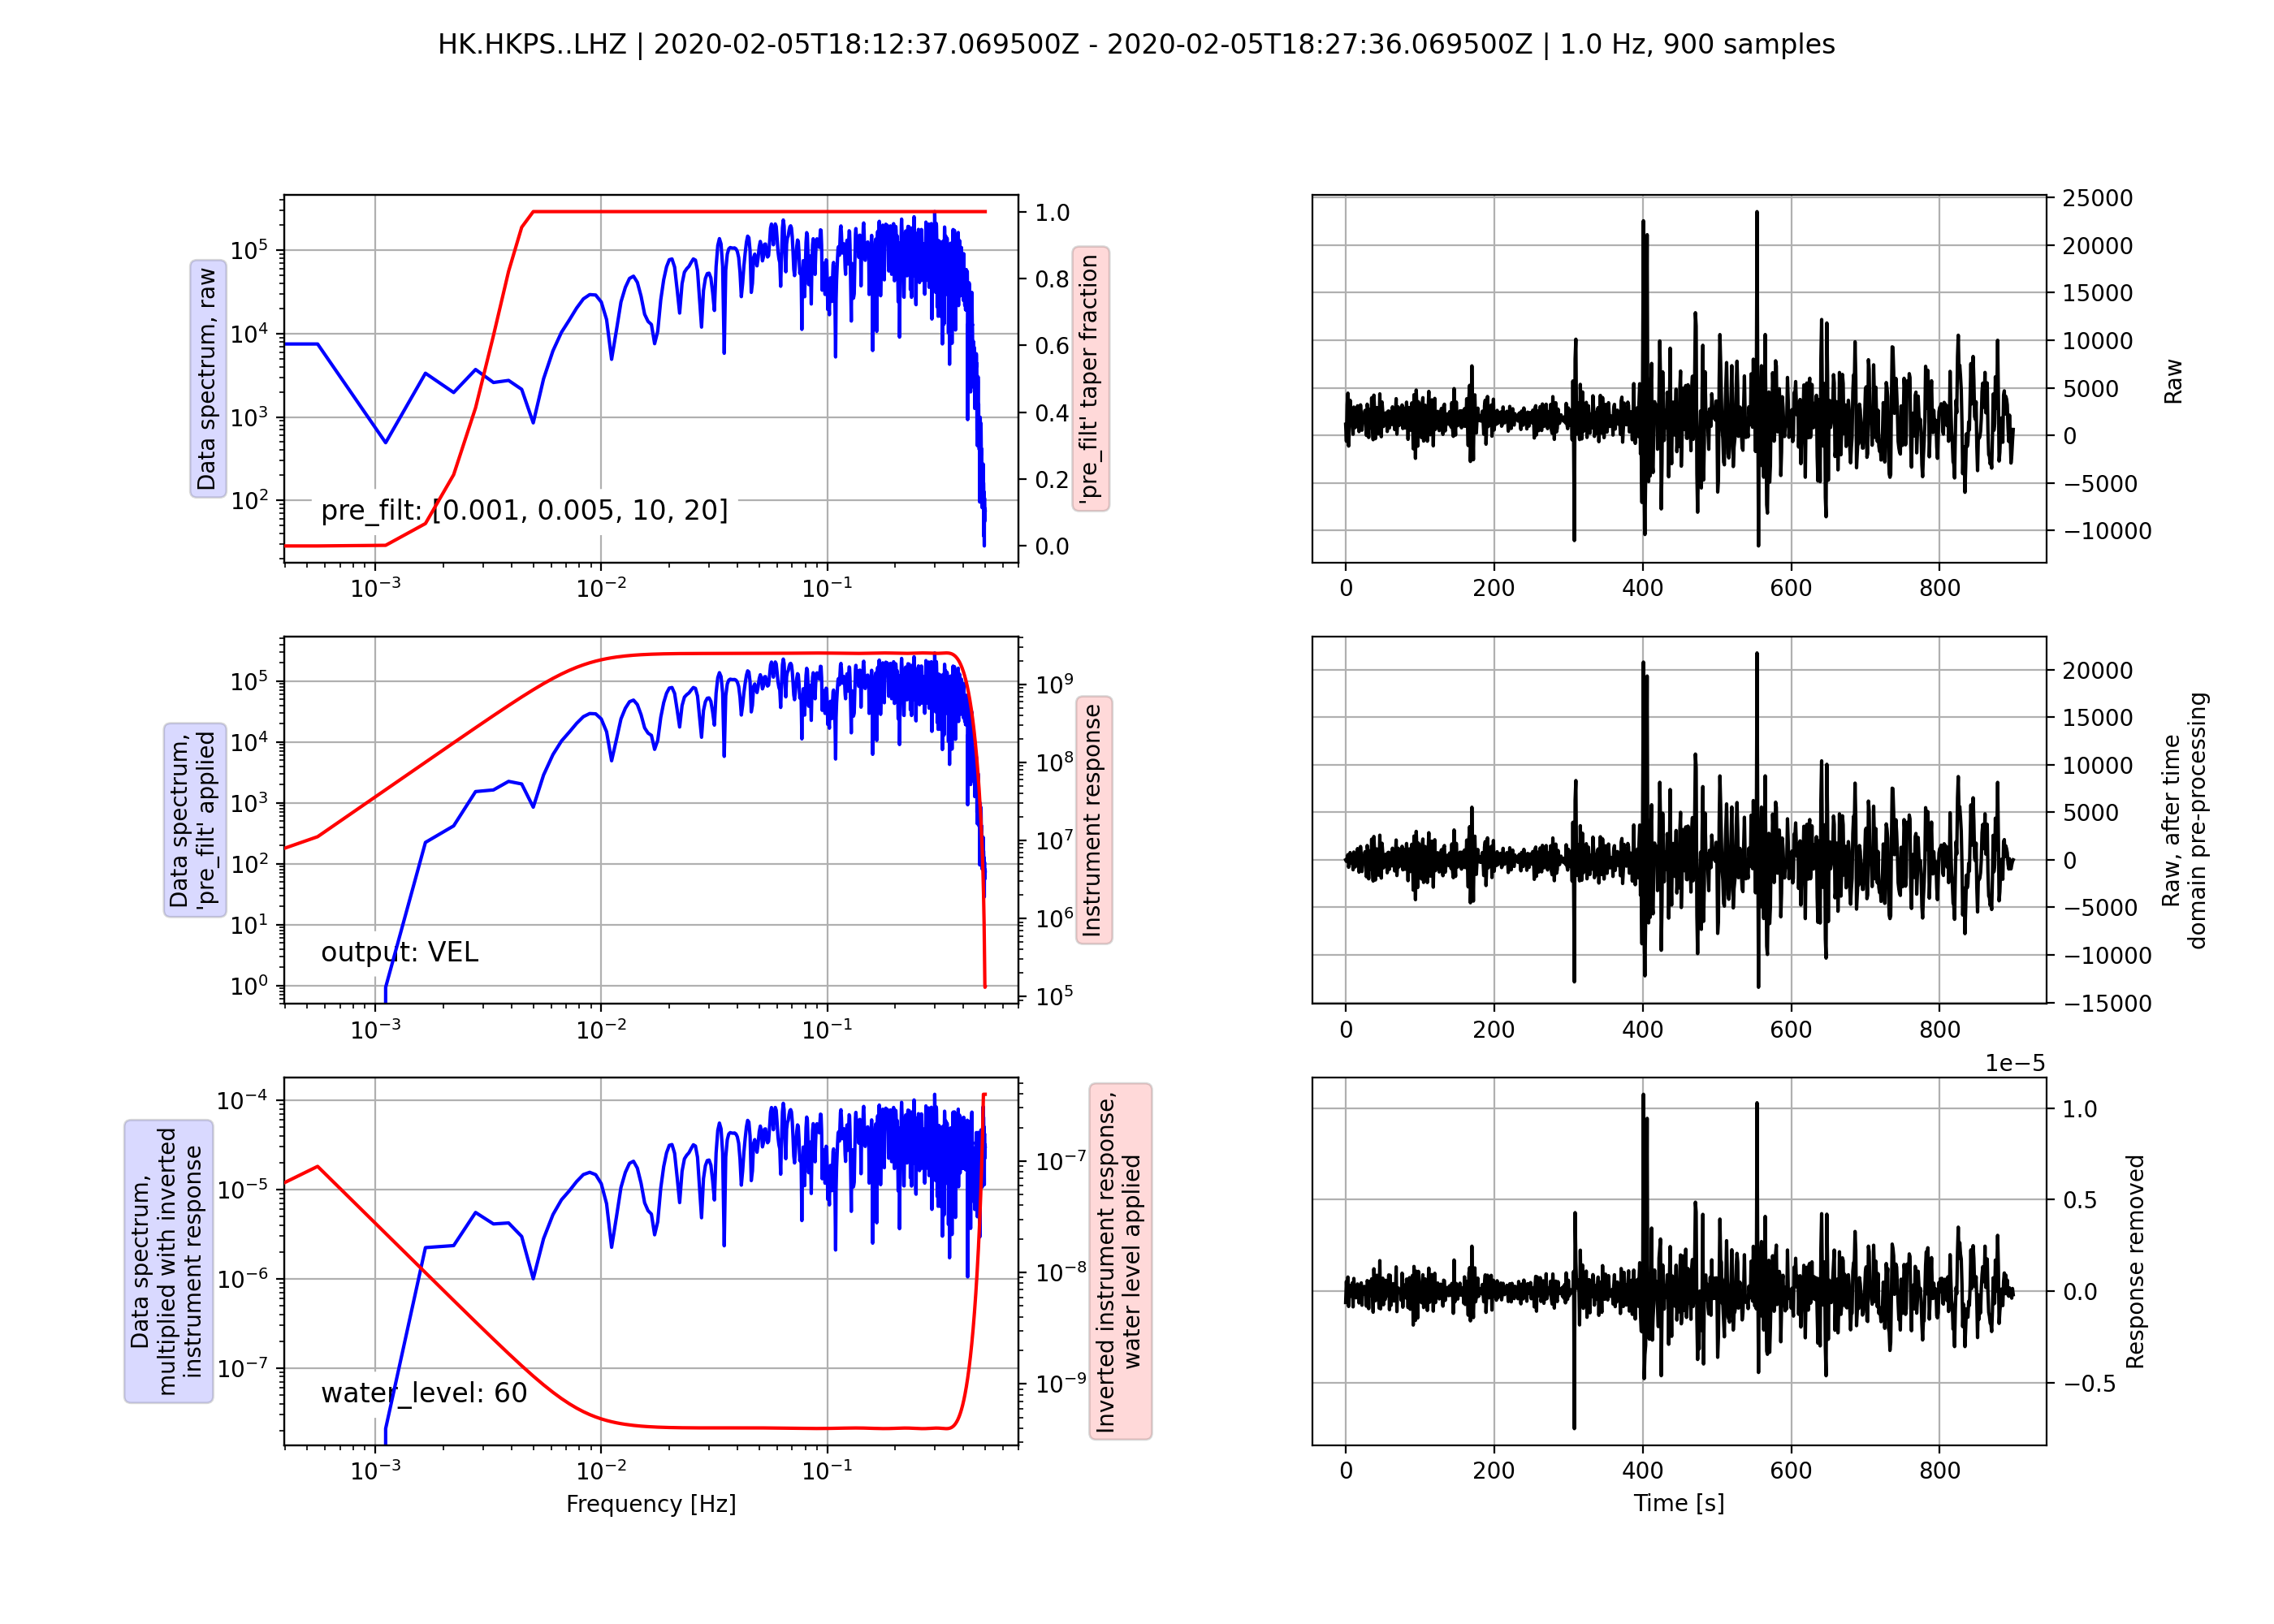

<IPython.core.display.Javascript object>


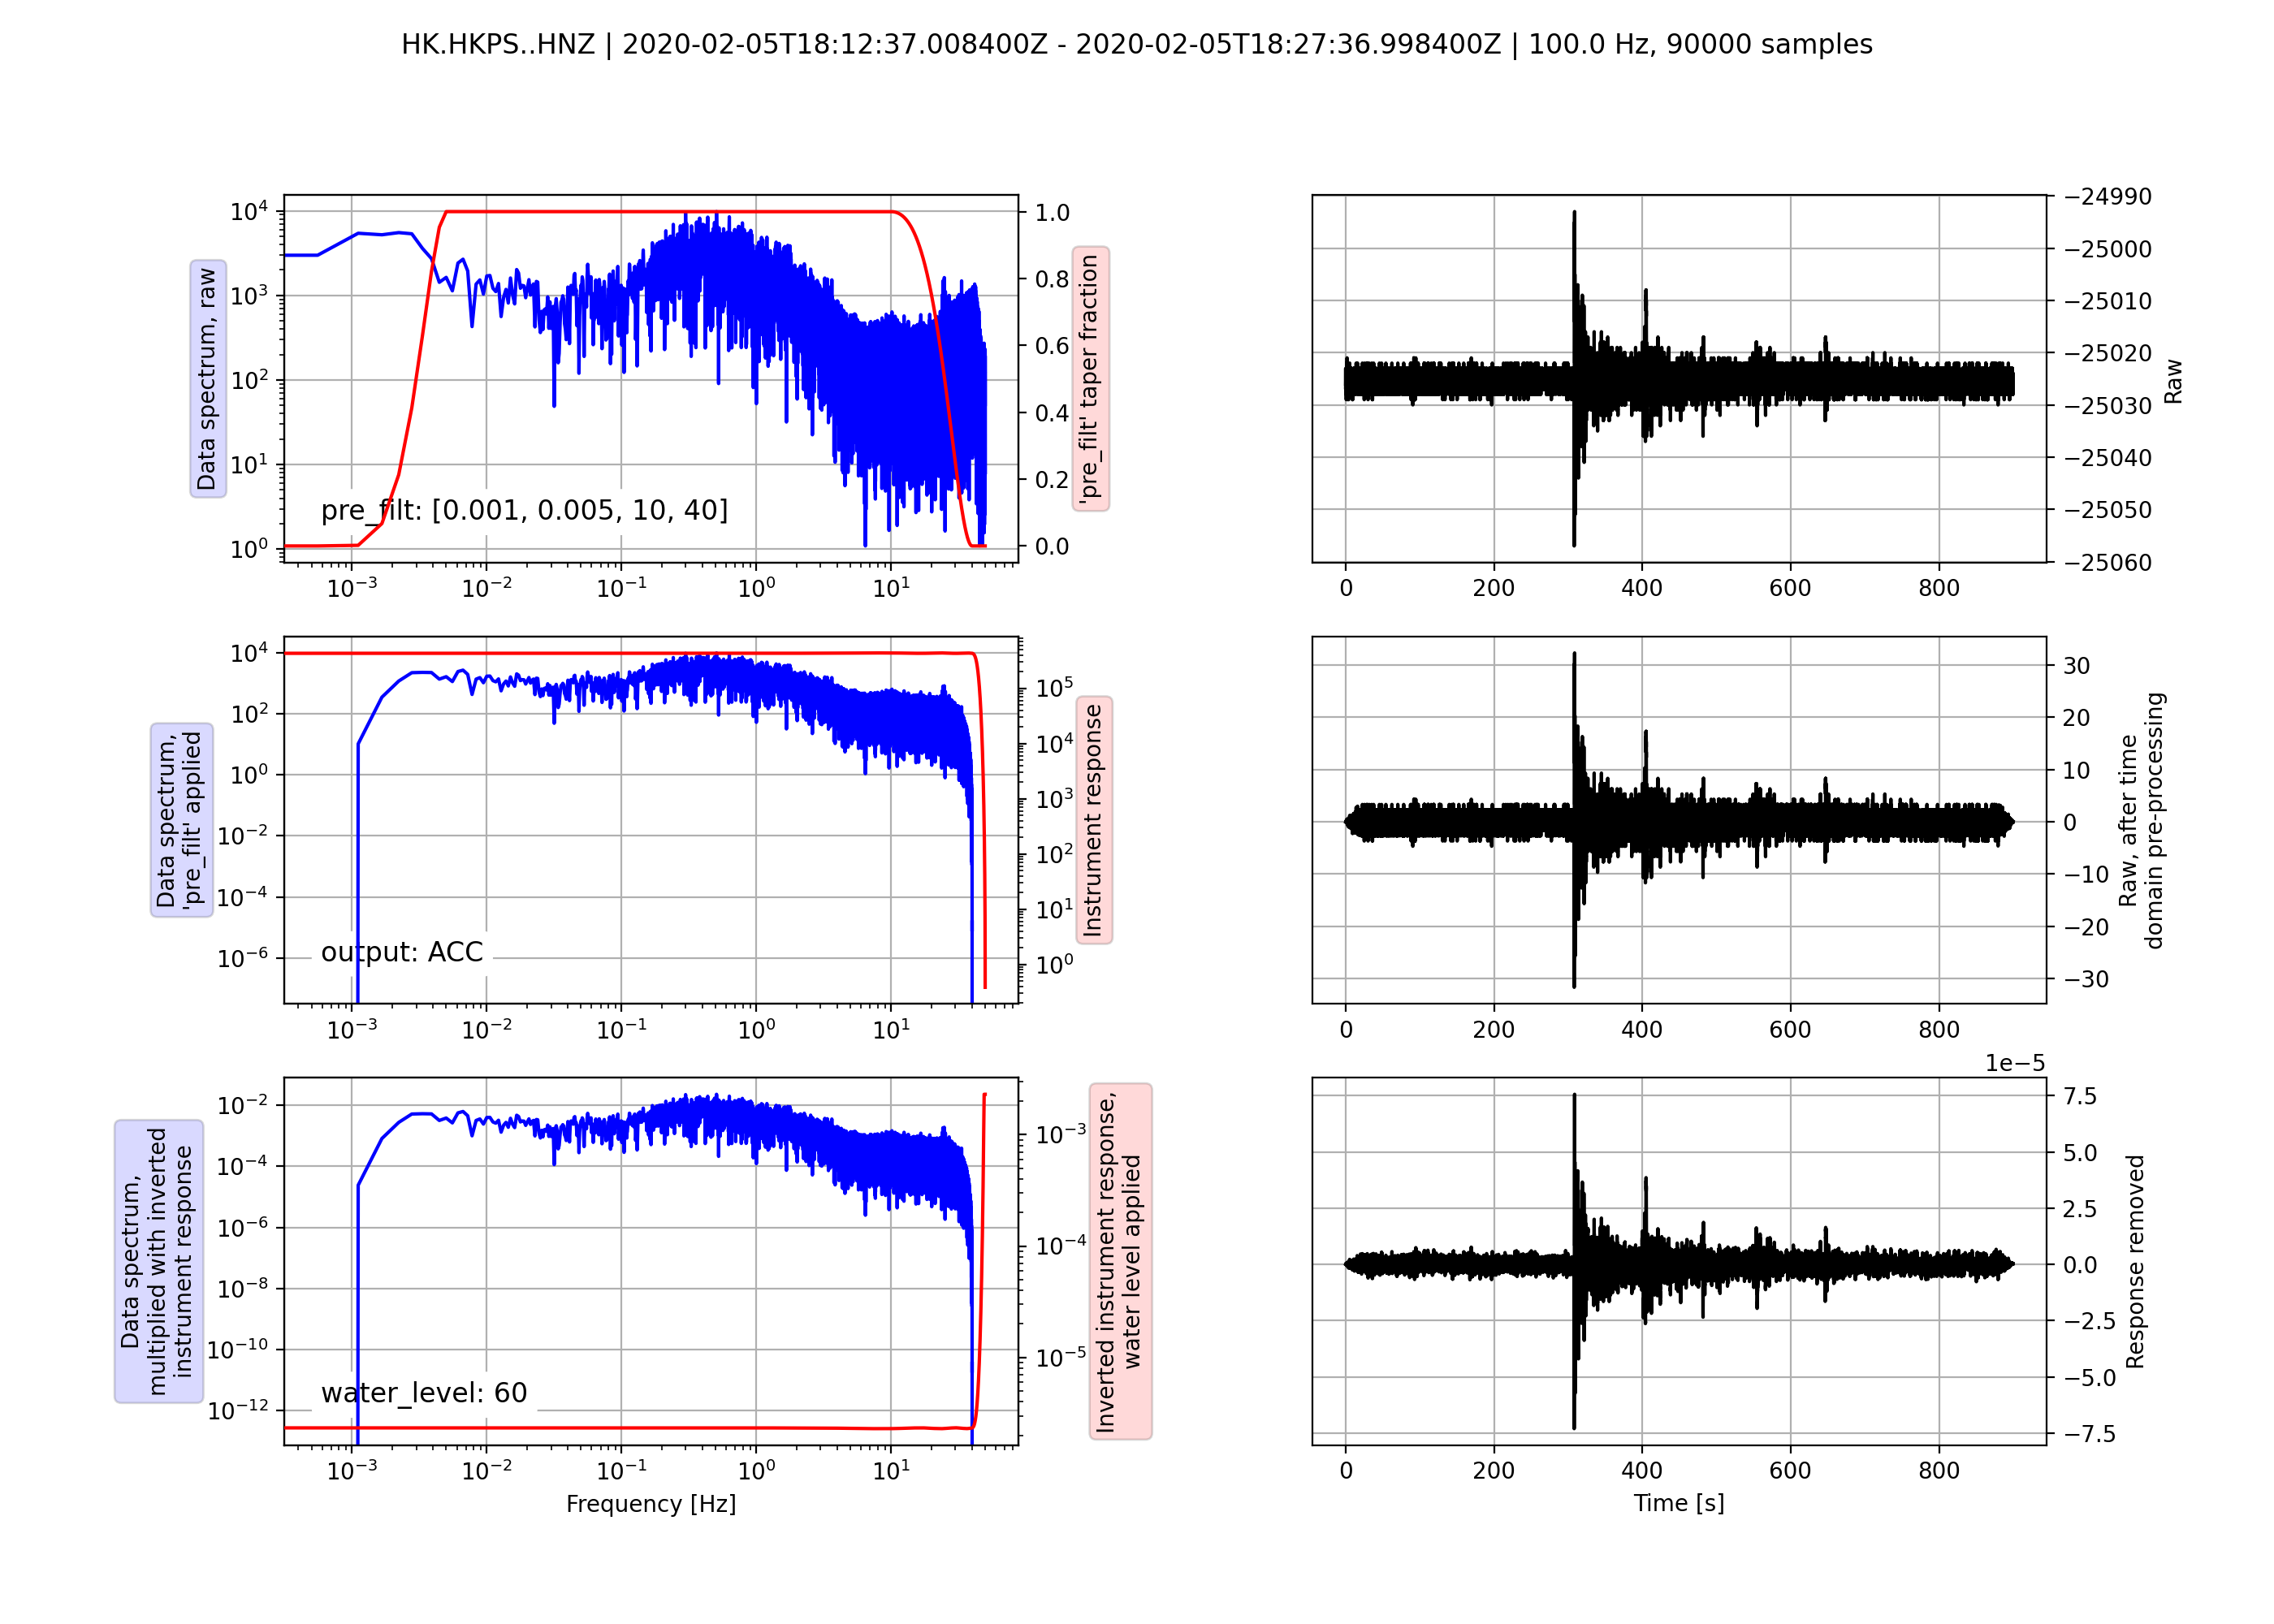

1 Trace(s) in Stream:
HK.HKPS..HNZ | 2020-02-05T18:12:37.008400Z - 2020-02-05T18:27:36.998400Z | 100.0 Hz, 90000 samples

In [52]:
st = Stream()

starttime = UTCDateTime("2020-02-05T18:12:37.000")
duration = 15*60

# IRIS
client = FDSNClient("IRIS")
for cha in "BHZ", "HHZ", "LHZ":
    st += client.get_waveforms("HK","HKPS","",cha, starttime,
                               starttime + duration, attach_response=True)
st_HNZ = client.get_waveforms("HK","HKPS","","HNZ", starttime,
                               starttime + duration, attach_response=True)

st.remove_response(plot=True, pre_filt = [0.001, 0.005, 10, 20], water_level=60)
st_HNZ.remove_response(plot=True, pre_filt = [0.001, 0.005, 10, 40], water_level=60,output='ACC')

### Case Study 2 - 2020-01-04T22:55:37 UTC M3.1Lantau Island 50 km

The following would demonstrate with a real local earthquake case from the Lantau M3.2 earthquake using the HKPS station.

<IPython.core.display.Javascript object>


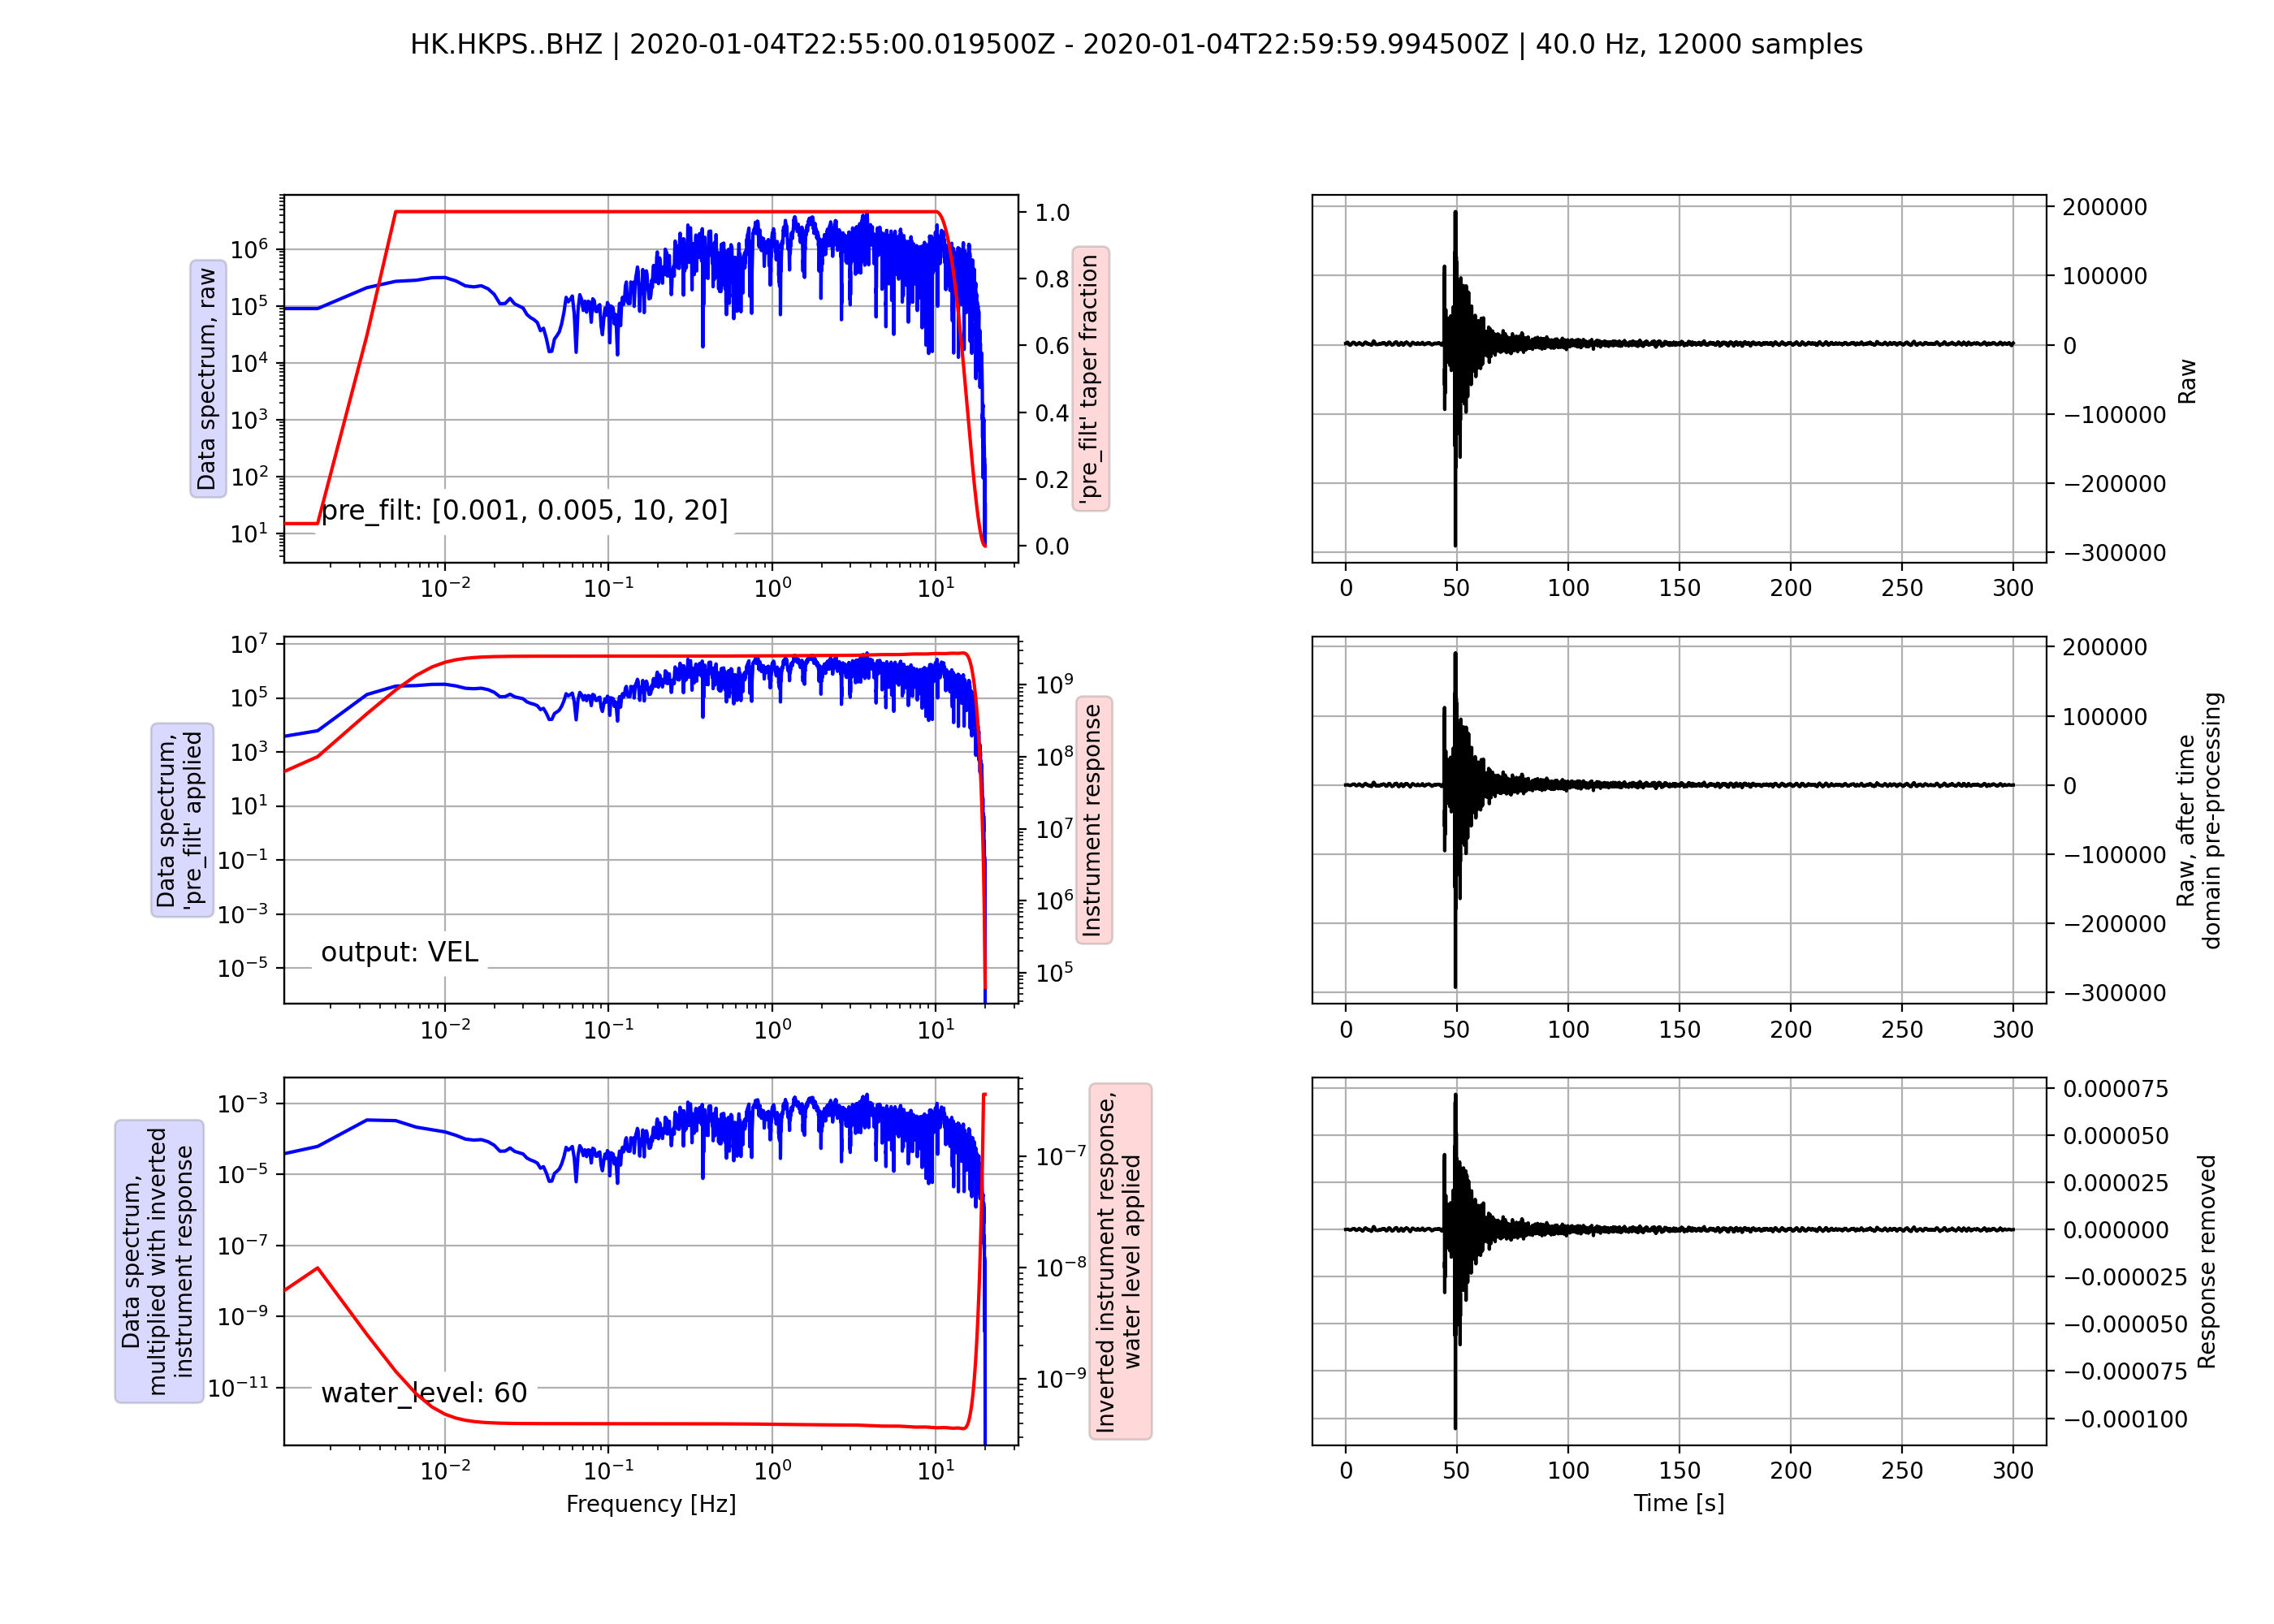

<IPython.core.display.Javascript object>


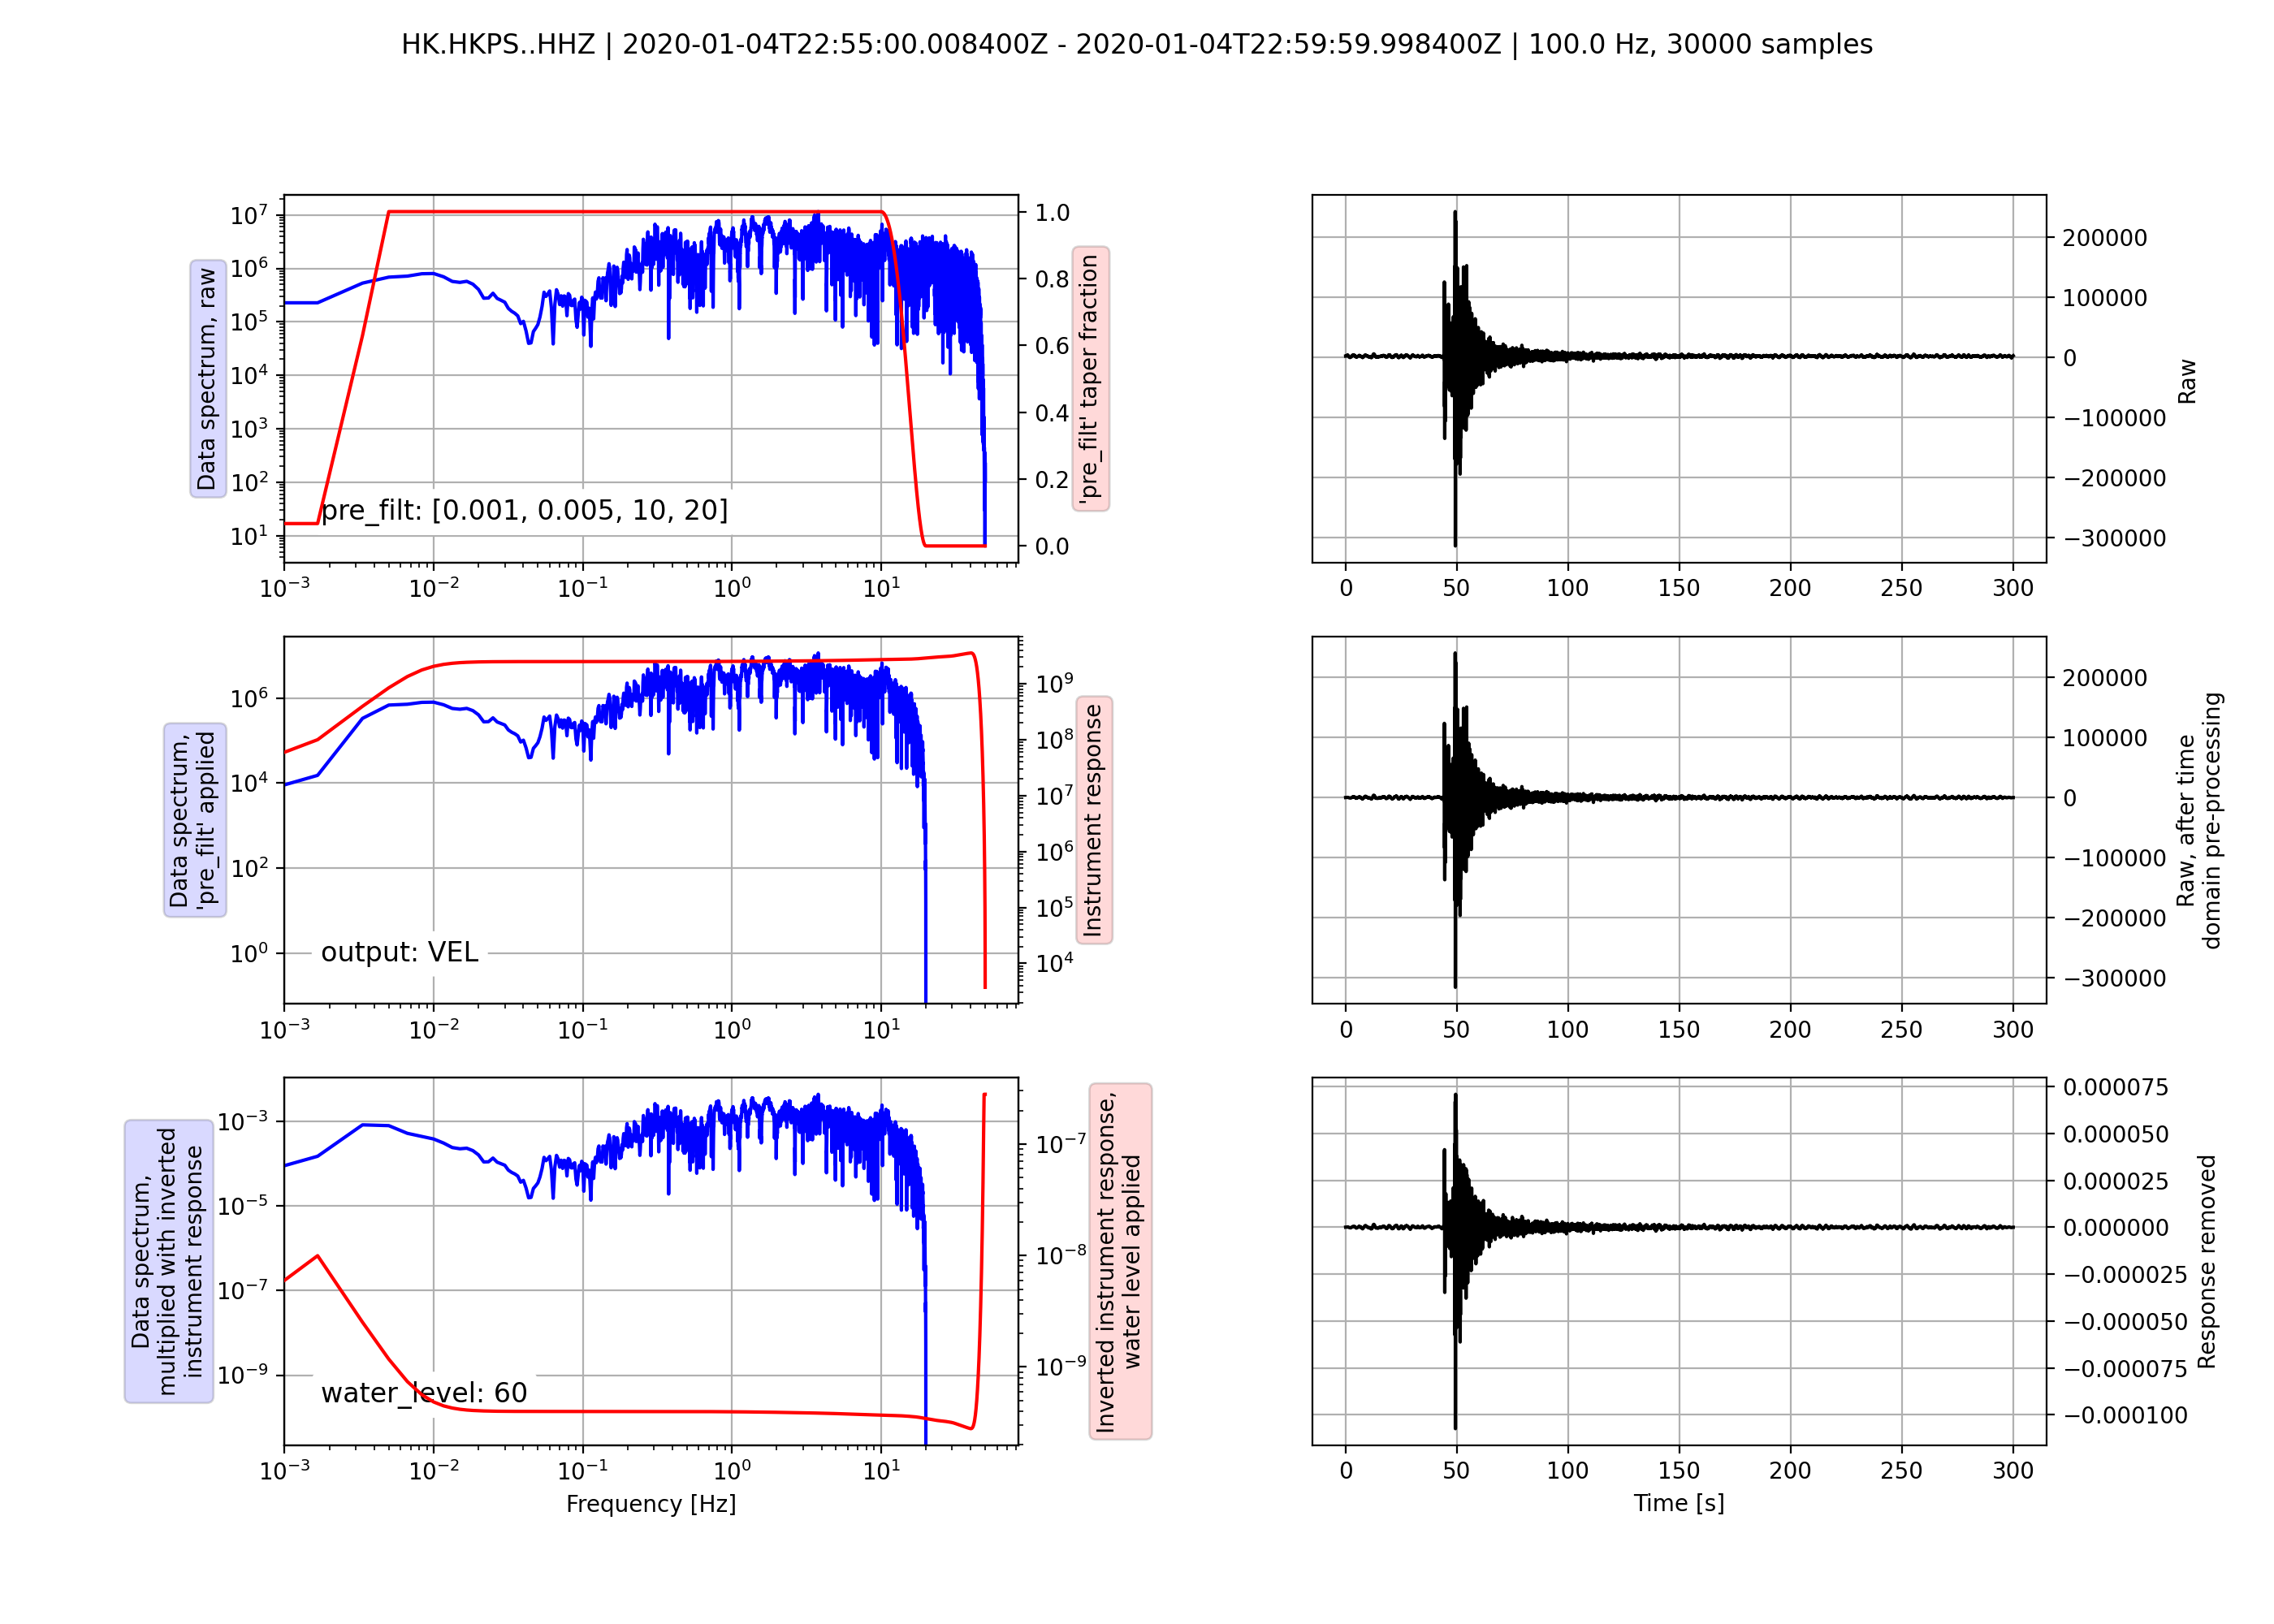

<IPython.core.display.Javascript object>


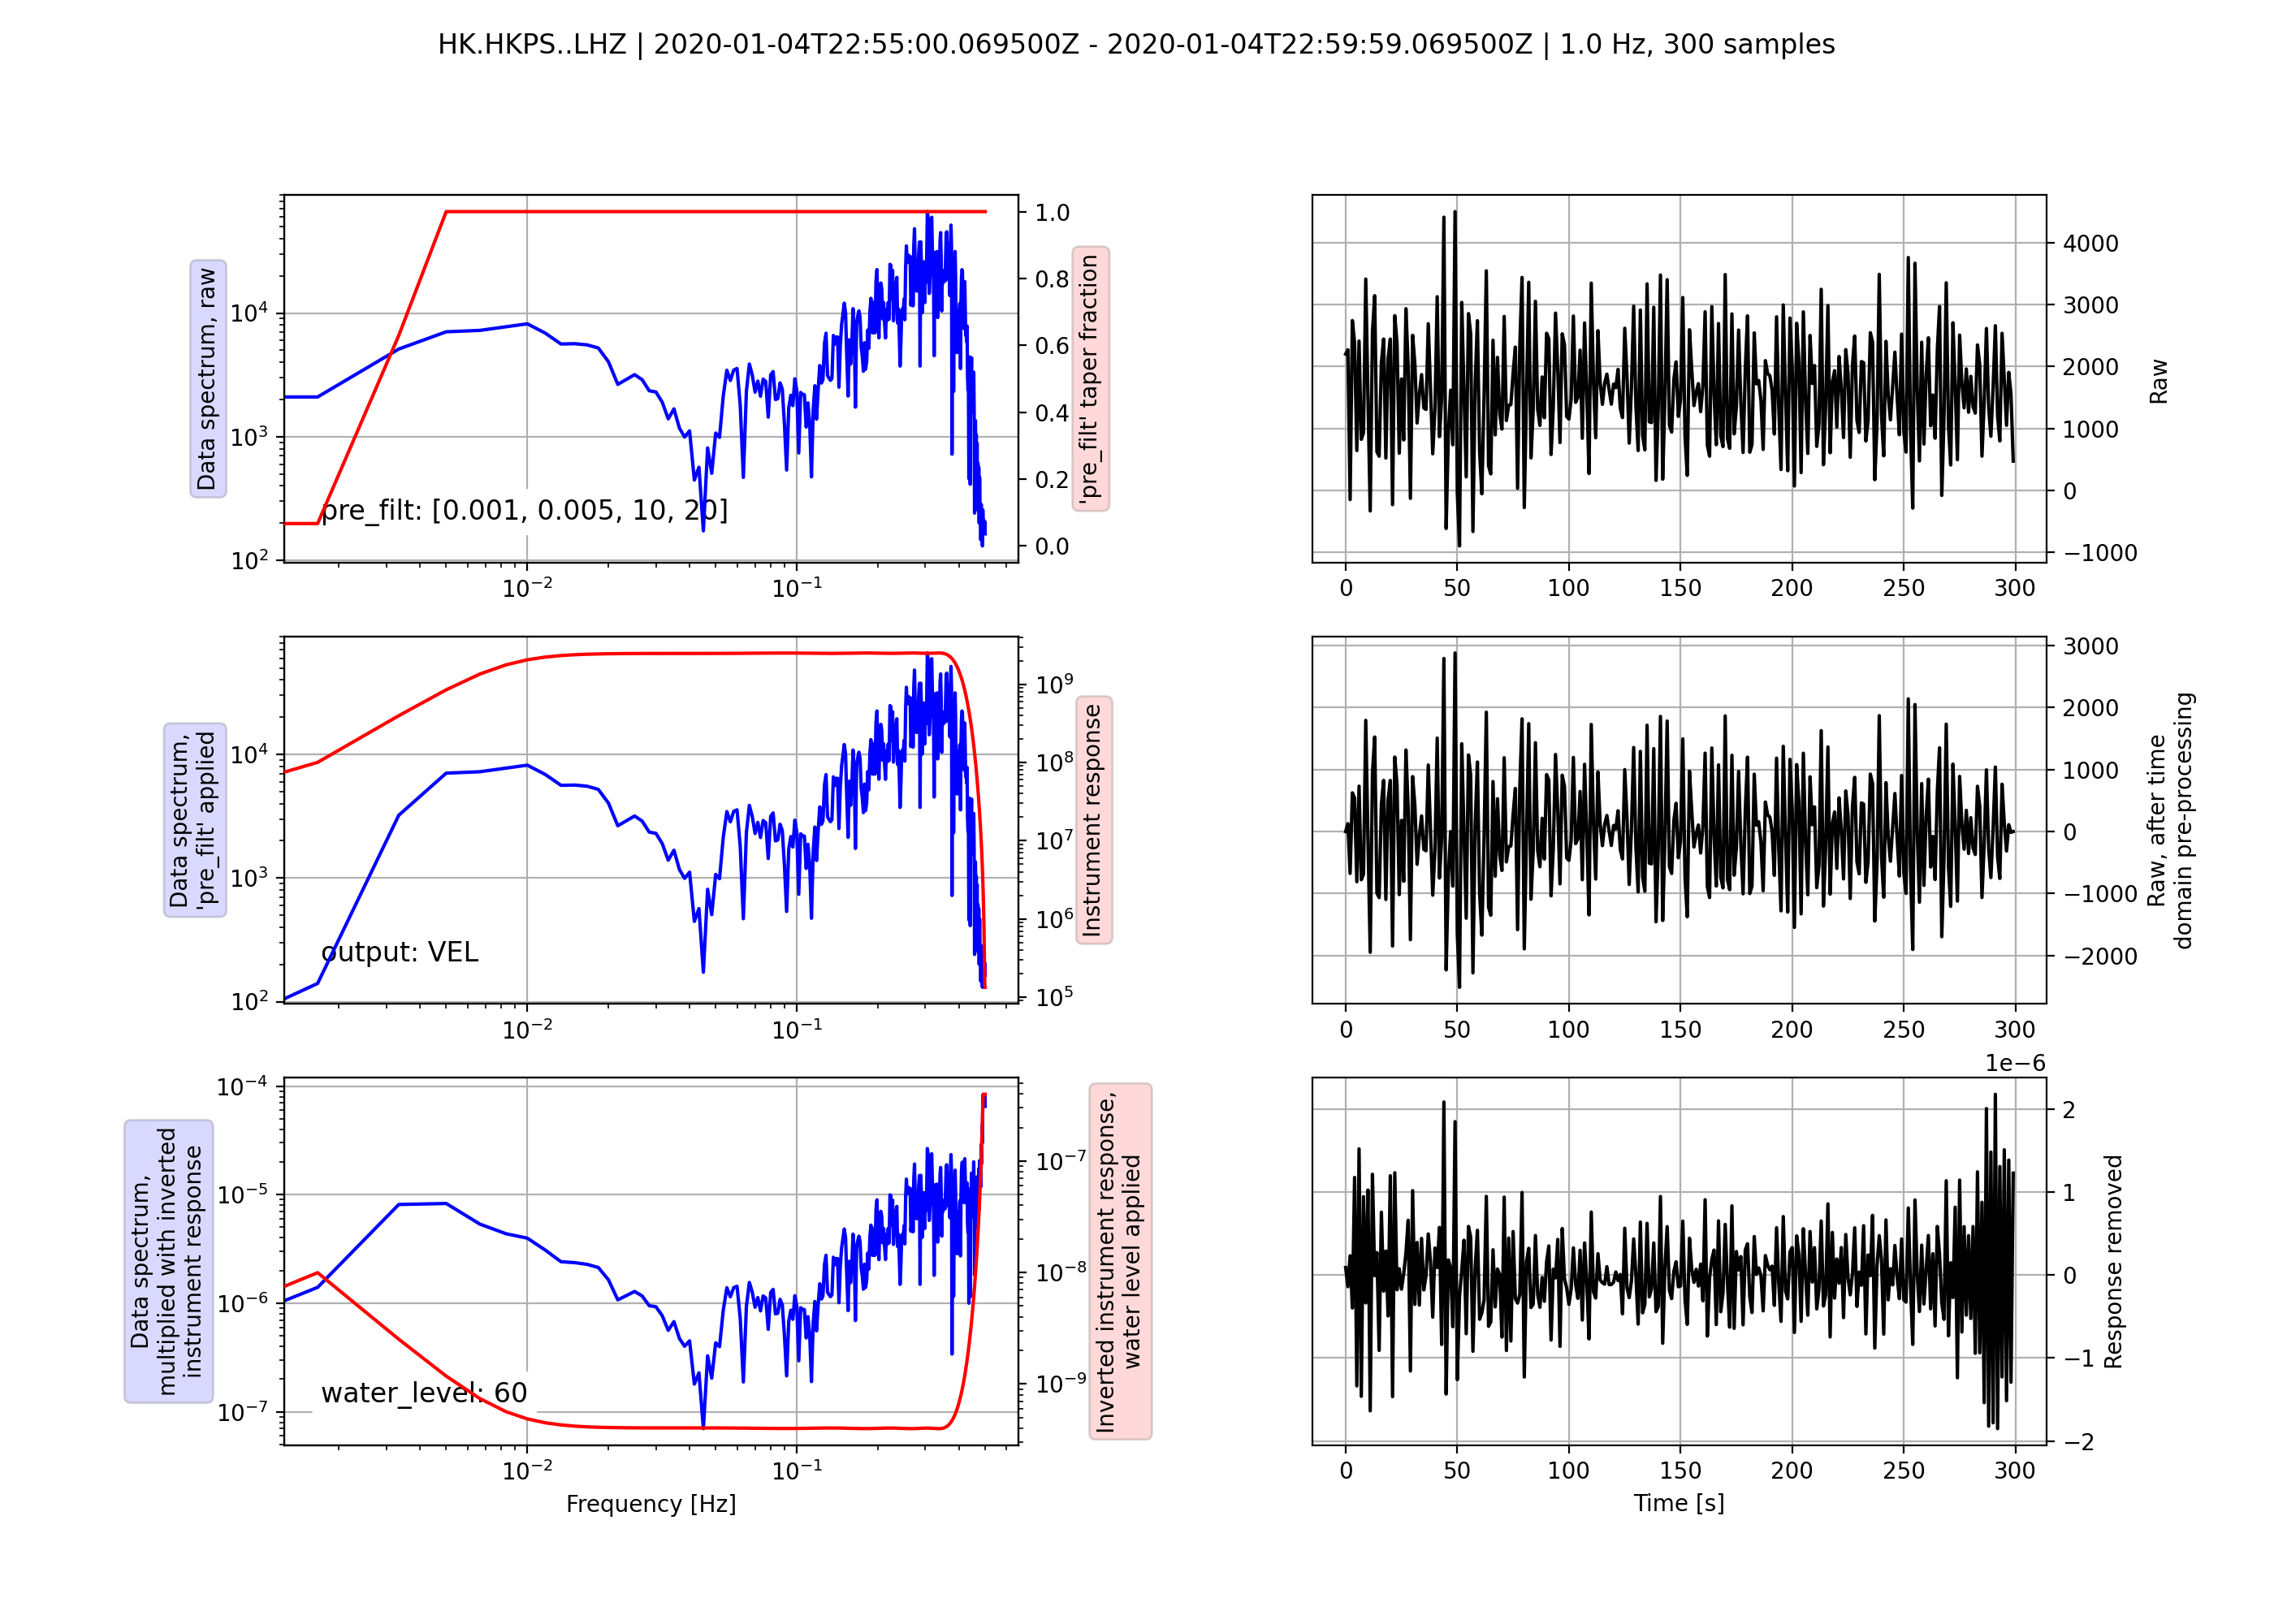

<IPython.core.display.Javascript object>


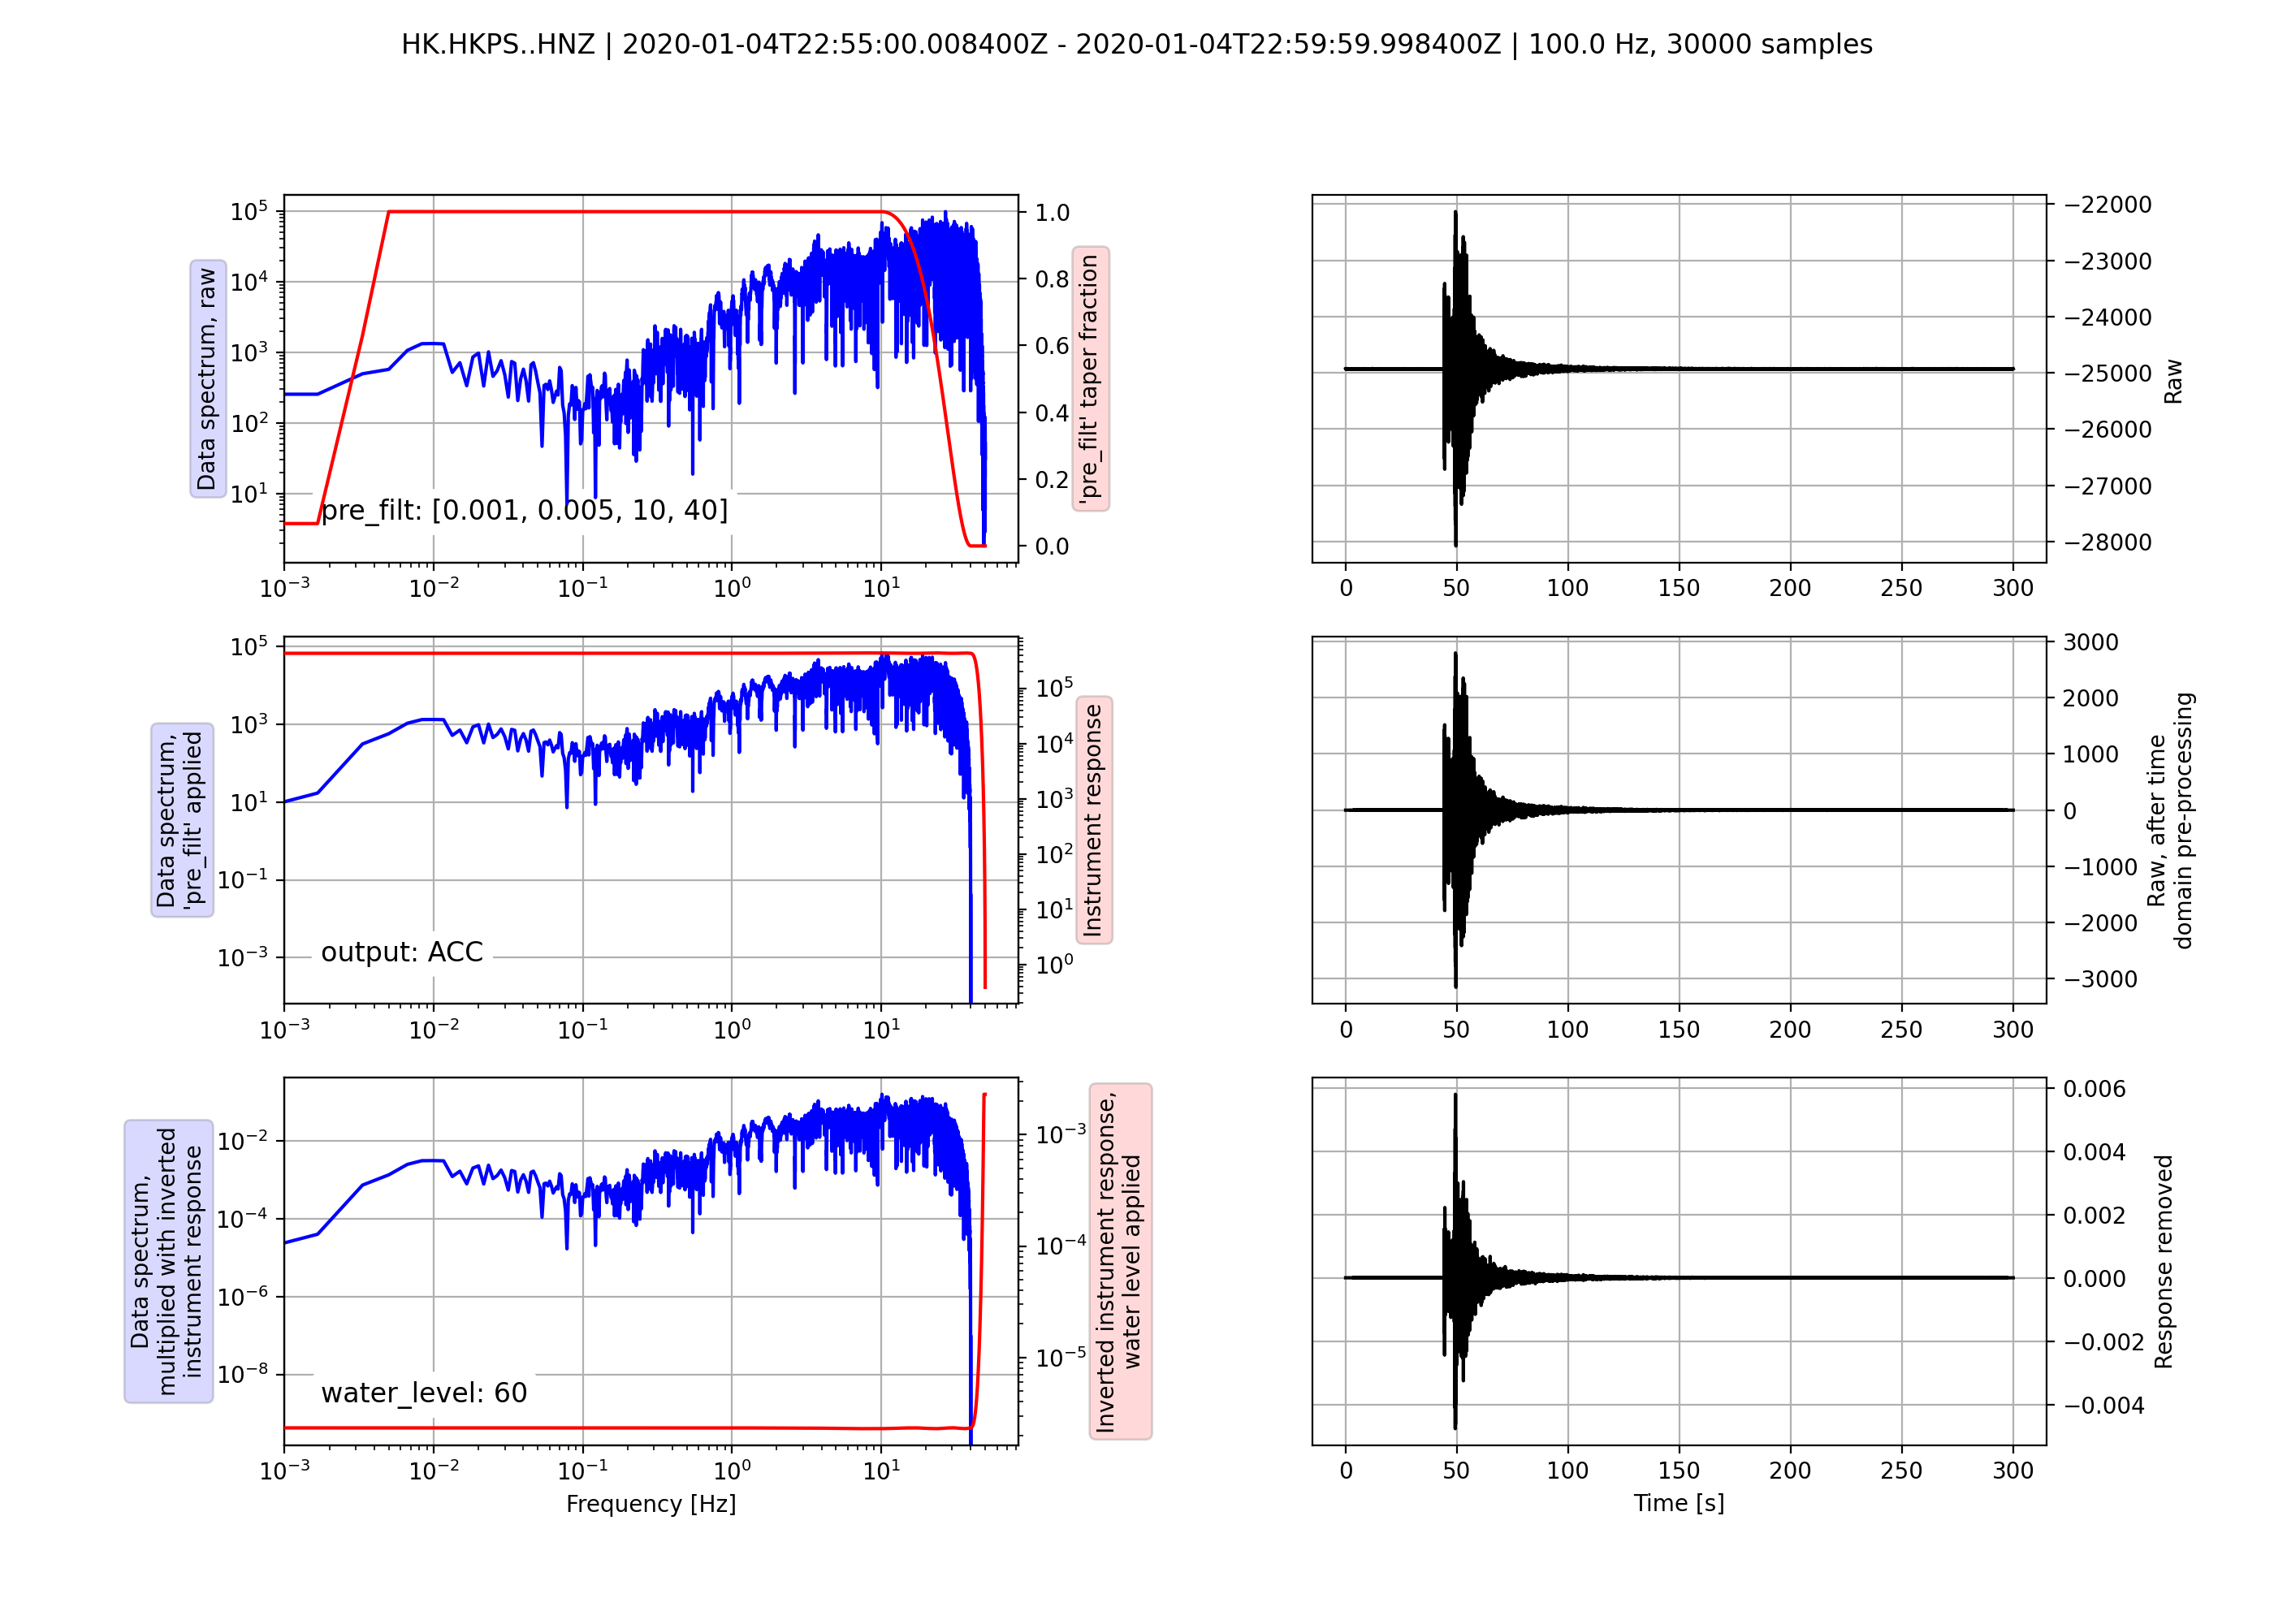

1 Trace(s) in Stream:
HK.HKPS..HNZ | 2020-01-04T22:55:00.008400Z - 2020-01-04T22:59:59.998400Z | 100.0 Hz, 30000 samples

In [53]:
st = Stream()

starttime = UTCDateTime("2020-01-04T22:55:00")
duration = 5*60

# IRIS
client = FDSNClient("IRIS")
for cha in "BHZ", "HHZ", "LHZ":
    st += client.get_waveforms("HK","HKPS","",cha, starttime,
                               starttime + duration, attach_response=True)
st_HNZ = client.get_waveforms("HK","HKPS","","HNZ", starttime,
                               starttime + duration, attach_response=True)

st.remove_response(plot=True, pre_filt = [0.001, 0.005, 10, 20], water_level=60)
st_HNZ.remove_response(plot=True, pre_filt = [0.001, 0.005, 10, 40], water_level=60,output='ACC')